# Tehtävä 1

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pyreadstat
from sklearn import linear_model
import statsmodels.api as sm

df_baro, meta_baro = pyreadstat.read_sav("../data/tiede_baro_2019.sav")

In [2]:
independent = ["sukupuoli", "koko.yli.80000", "ylempi.tutkinto", "luottamus", "yhtk.kiinnostus", "Asenne epätieteellisiä ilmiöitä kohtaan"]
dependent = ["huoli.teknologisoitumisesta"]
f2_qs = ["q9_8.uusi", "q9_21.uusi", "q9_29.uusi"]

df_baro["Asenne epätieteellisiä ilmiöitä kohtaan"] = df_baro[f2_qs].mean(axis=1)
df_reg = (df_baro[independent + dependent]).dropna()
print(f"Dropped rows: {df_baro.shape[0] - df_reg.shape[0]} out of {df_baro.shape[0]}")
df_reg.to_csv("/home/kilo/")

Dropped rows: 1222 out of 2209


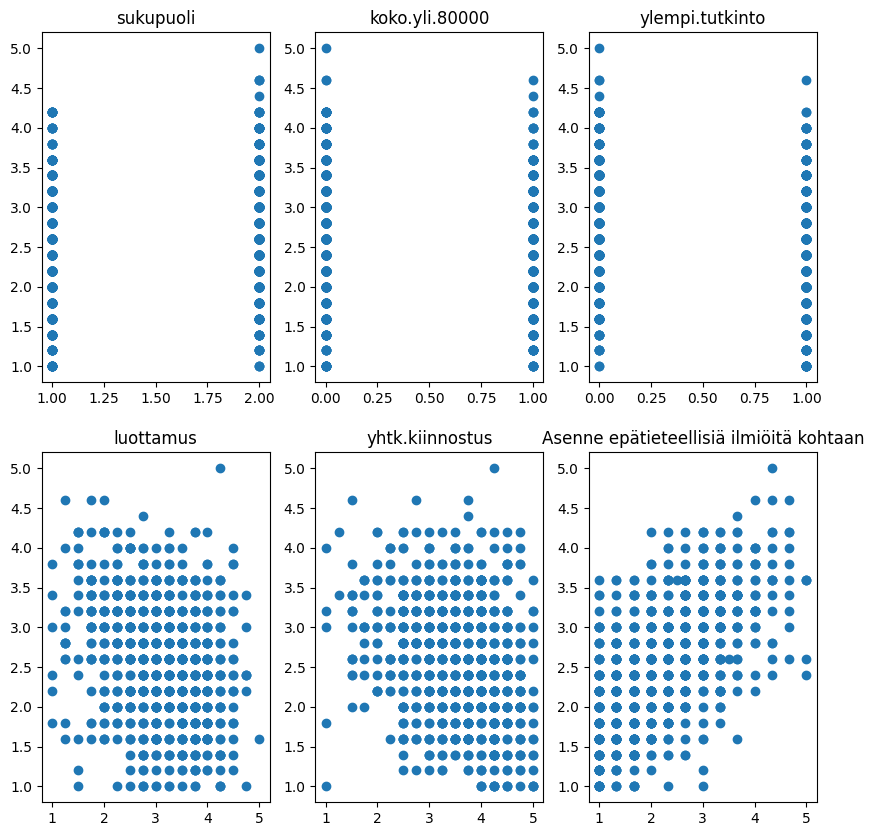

In [3]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(df_reg["sukupuoli"], df_reg[dependent])
axs[0, 0].set_title("sukupuoli")
axs[0, 1].scatter(df_reg["koko.yli.80000"], df_reg[dependent])
axs[0, 1].set_title("koko.yli.80000")
axs[0, 2].scatter(df_reg["ylempi.tutkinto"], df_reg[dependent])
axs[0, 2].set_title("ylempi.tutkinto")
axs[1, 0].scatter(df_reg["luottamus"], df_reg[dependent])
axs[1, 0].set_title("luottamus")
axs[1, 1].scatter(df_reg["yhtk.kiinnostus"], df_reg[dependent])
axs[1, 1].set_title("yhtk.kiinnostus")
axs[1, 2].scatter(df_reg["Asenne epätieteellisiä ilmiöitä kohtaan"], df_reg[dependent])
axs[1, 2].set_title("Asenne epätieteellisiä ilmiöitä kohtaan")
fig.set_size_inches(10, 10)

In [4]:
regr = linear_model.LinearRegression()
regr.fit(df_reg[independent], df_reg[dependent])

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [2.30409285]
Coefficients: 
 [[ 0.07359048 -0.08605293 -0.15860169 -0.13402854 -0.07639413  0.41266274]]


In [5]:
# with statsmodels
x = sm.add_constant(df_reg[independent]) # adding a constant
 
model = sm.OLS(df_reg[dependent], x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:     huoli.teknologisoitumisesta   R-squared:                       0.431
Model:                                     OLS   Adj. R-squared:                  0.428
Method:                          Least Squares   F-statistic:                     124.0
Date:                         Mon, 13 Feb 2023   Prob (F-statistic):          1.51e-116
Time:                                 20:53:14   Log-Likelihood:                -806.16
No. Observations:                          987   AIC:                             1626.
Df Residuals:                              980   BIC:                             1661.
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------

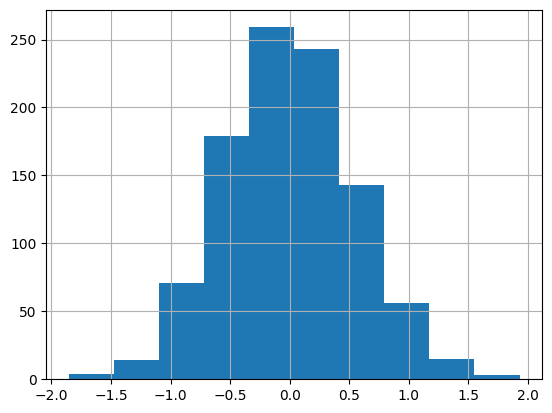

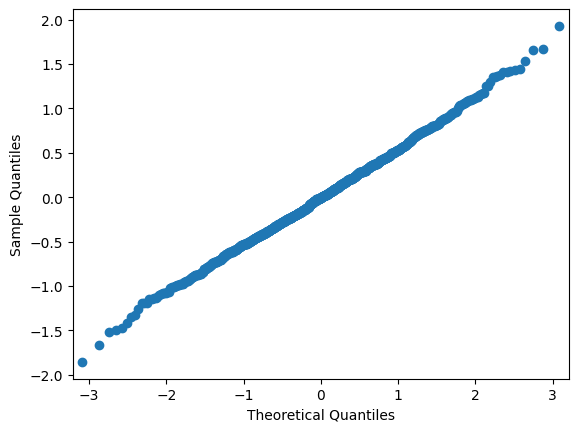

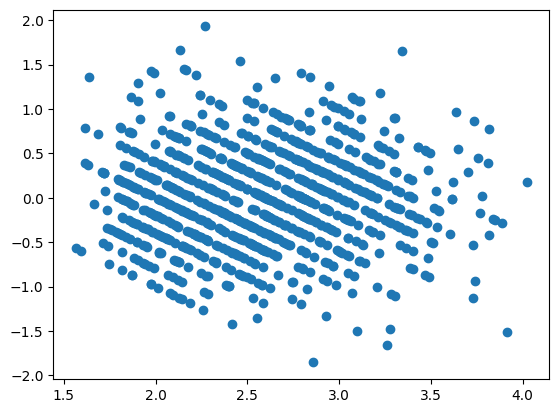

In [6]:
model.resid.hist()
plt.show()
linplot = sm.ProbPlot(model.resid).qqplot()
plt.show()
plt.scatter(model.fittedvalues, model.resid)
plt.show()

# Tehtävä 2

- Ylemmän tason muuttuja (driver) -> sisemmän tason muuttuja (duration), eli kuinka paljon tuo ylemmän tason muuttuja selittää tutkittavaa, eli riippuvaa, muuttujan vaihtelua. Tällä todennetaan sisäkorrelaation olemassa olo, jota on olemassa. Muuten monitasomallin käyttäminen ei ole mielekästä tai perusteltua, jos sisäkorrelaatiota ei ole.

In [81]:
import statsmodels.formula.api as smf

df_multi, multi_meta = pyreadstat.read_sav("../data/Multilevel.sav")
df_multi.rename(columns={"screen.size": "screensize"}, inplace=True)

dependent = "duration"
fixed = ["od", "screensize", "UI"]
random = "driver"

df_mixed = df_multi[[dependent]+fixed+[random]].dropna()
print(f"Dropped rows: {df_multi.shape[0] - df_mixed.shape[0]} out of {df_multi.shape[0]}")

Dropped rows: 54 out of 14990


In [106]:
ui_dict = {"Carrio": 1, "Android": 2}
df_mixed["UI"].replace(ui_dict, inplace=True)

driver_dict = {f"{df_mixed['driver'].unique()[i-1]}": i for i in range(1, df_mixed["driver"].unique().shape[0]+1)}
df_mixed["driver"].replace(driver_dict, inplace=True)

df_mixed.head()
driver_dict

{'1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '10': 10,
 '11': 11,
 '12': 12,
 '13': 13,
 '14': 14,
 '15': 15,
 '16': 16,
 '17': 17,
 '18': 18,
 '19': 19,
 '20': 20,
 '21': 21,
 '22': 22,
 '23': 23,
 '24': 24,
 '25': 25,
 '26': 26,
 '27': 27,
 '28': 28,
 '29': 29,
 '30': 30,
 '31': 31,
 '32': 32,
 '33': 33,
 '34': 34,
 '35': 35,
 '36': 36,
 '37': 37,
 '38': 38,
 '39': 39,
 '40': 40,
 '41': 41,
 '42': 42,
 '43': 43,
 '44': 44,
 '45': 45,
 '46': 46,
 '47': 47}

In [107]:
mixed_model = smf.mixedlm(formula="duration ~ od + screensize + UI + 1", groups="driver", data=df_mixed,
                         re_formula="~ 1 + od + screensize + UI")
results = mixed_model.fit(method=["lbfgs"])
res = results.summary()
print(res)

/home/kilo/.cache/pypoetry/virtualenvs/kogs403-W0KEx8Fx-py3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    duration   
No. Observations:     14936      Method:                REML       
No. Groups:           47         Scale:                 0.2295     
Min. group size:      197        Log-Likelihood:        -10445.2253
Max. group size:      449        Converged:             Yes        
Mean group size:      317.8                                        
-------------------------------------------------------------------
                        Coef.   Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                0.673     0.072  9.378 0.000  0.532  0.813
od                       0.010     0.011  0.929 0.353 -0.011  0.032
screensize               0.020     0.040  0.498 0.618 -0.058  0.098
UI                       0.274     0.022 12.417 0.000  0.231  0.317
driver Var               0.103 22833.067                       

/home/kilo/.cache/pypoetry/virtualenvs/kogs403-W0KEx8Fx-py3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [103]:
mixed_model = smf.mixedlm(formula="duration ~ driver + 1", groups=random, data=df_mixed, re_formula="~ 1 + driver")
results = mixed_model.fit(method=["lbfgs"])
res = results.summary()
print(res)
print(result.resid)

/home/kilo/.cache/pypoetry/virtualenvs/kogs403-W0KEx8Fx-py3.10/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


            Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  duration   
No. Observations:    14936    Method:              REML       
No. Groups:          47       Scale:               0.2545     
Min. group size:     197      Log-Likelihood:      -11069.4675
Max. group size:     449      Converged:           Yes        
Mean group size:     317.8                                    
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            1.140    0.056 20.193 0.000  1.030  1.251
driver               0.004    0.002  2.126 0.034  0.000  0.008
driver Var           0.037    0.053                           
driver x driver Cov -0.000    0.002                           
driver Var           0.000    0.000                           



ValueError: Cannot predict random effects from singular covariance structure.

AttributeError: 'MixedLM' object has no attribute 'resid'